# Unsupervised Learning

### Clustering

Clustering is the task of identifying similar instances and grouping them together. These groups of similar instances are called as clusters.

### Types of Clustering

#### Hard Clustering

Each data point is either completely assigned to a cluster or not.

#### Soft Clustering

Instead of putting each data point into separate cluster, a probability of that data point belonging to those clusters are assigned.

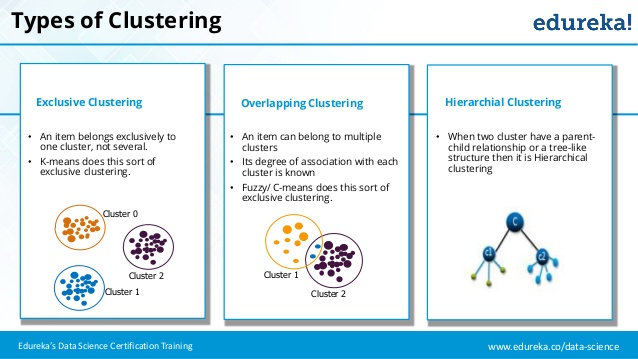

### Applications

**Customer Segmentation** 

You can cluster your customers based on their purchases/activity on website so on.  Recommender systems are used to suggest that other users in the same cluster are enjoyed.

**Anamoly or Outlier Detection**

Anamoly Detection is used in fraud detection. Any instance that has low affinity (affinity is any measure of how well an instance fits into a cluster) to all the clusters is likely to be an anomoly.

Ex: Users with unusual behavior, unusual number of requests per second. 

**Semi-supervised Learning** 

If you only have few labels, you could perform clustering and propagate the labels to all the instances in the same cluster. You can also combine it with "Active learning", It is an iterative algorithm where the learner request the user to label a few samples in each iteration, and this repeated till convergence.

Other applications include, Data Analysis, Dimensionality Reduction, Search Images, Image segementation. etc.

### K-Means Clustering

K-Means is simple, fast and very effective clustering algorithm.

We first specify the no. of clusters k the algorithm must find. Then algorithm finds each blob's center. Next, it assigns new instances to the cluster whose centroid is the closest.

Few instances were probably mislabeled, particularly instances near boundaries of the clusters. Instead of hard classification you can also do soft classification. Soft classification computes the score per each instance, score might be the distance between the instance and centroid or similarity score.

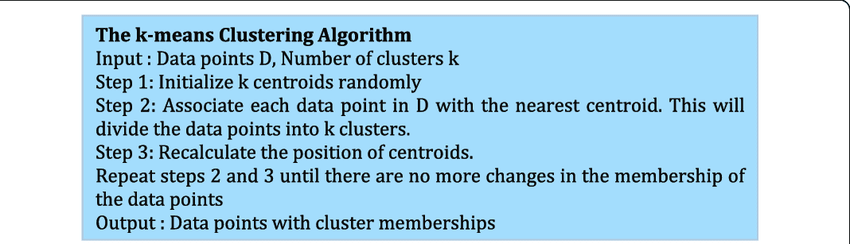

#### How does K-Means Algorithm work?

Suppose you were given centroids, you can label all the instances to the cluster whose centroid is the closest.

Suppose you were given all instance labels (Cluster labels not class labels), you could easily locate all centroids by computing the mean of instances in each cluster.

*But you were given neither centroids nor labels, How will you proceed?*

Just start by placing the centroids randomly (picking k instances at random and using their location as centroids).

Then label all the instances according to their distance from centroid and measure performance. Repeat this procedure until all the instances are correctly clustered.

Creating and Optimizing clusters stops when,

1. Centroids are stabilized.

2. Defined number of iterations are achieved.

#### Centroid Initialization Technique

The clustering might change depending on the random centroid initilization. 

1. You can choose cluster initilization points maually. You can pass which data points you want as centroids through "init" hyperparameter.

2. Run the algorithm multiple times with different random initializations and keep the best solution.  This is controlled by "n_init" hyperparameter. By default it is set to 10. This means algorithm runs 10 times with 10 different sets of cluster points.

#### How to know which solution is best?

K-Means uses performance metric called "inertia". It is mean squared distance between each instance and the closest centroid.

"K-Means" runs the algorithm "n_init" times and keep the model with lower "Inertia".

#### Mini-Batch K-Means

Instead of using full dataset at each iteration, the algorithm is capable of using mini-batches, moving the centroids just slightly at each iteration. This speeds up the algorithm.

-- from sklearn.clusters MiniBatchKmeans
 
-- use partial_fit() method.

-- use memap() class to produce mini-batches from the training data.

Although it is faster, as the number of clusters increases its inertia becomes worse.

### How to find the optimal number of clusters?

The inertia is not good performance metric when trying to choose 'k', Since it keeps getting lower as we increase 'k'. 

Ineed, the more clusters there are, the closer each instance will be to its closest centroid and therefore lower the inertia will be.

**Elbow Rule** Inertia will drop quickly at elbow point as we increase k, but it then decreases much more slowly as we increasing k.

The number of clusters at elbow point can be choses as right number of clusters.

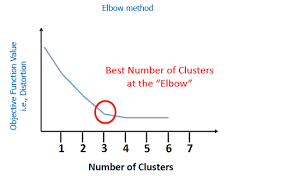

#### Silhoutte Score

The more precise and computationally expensive approach to choosing the best value for number of clusters is by using silhoutte score.

Silhoutte score is mean silhoutte coefficient over all the instances.

Silhoutte Coefficient (Si) = 
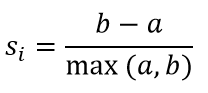


Where,

a = mean distance to other instances in the same cluster

b = mean distance to the instances of next closest cluster

Silhoutte coefficient can be vary upto -1 to +1

+1 means instance is well inside of own cluster and far from other clusters.

0 means point to closer to cluster boundary

-1 means instance assigned to wrong cluster.

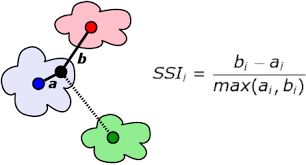

### Limitations of KMeans

We need to specify No. of clusters.

We need to run algorithm several times until convergence

KMeans doesnt perform well when the clusters having varying sizes, different densities or non-spherical shapes.

#### importance of scaling in clustering

It is important to scale the features before you run K-Means, or else clusters may be very stretched and KMeans will perform poorly. 

Scaling will not gaurentee you clusters will be nice and spherical but it generally improve things.

### Using Clustering for Pre-Processing

Clustering can be efficient approach for dimensionality reduction. It is used as pre-processing step before applying supervised learning algorithm.

Example: We can create a pipeline that will cluster the training set (MNIST digits) into 50 Clusters and replace the images with these distances to 50 
clusters and then apply logistic regression model.

Although it is tempting to define number of clusters to be 10, Since there are 10 different digits, it is unlikely to perform well, because there are several different ways to write each digit.

#### How to find No. of clusters when using KMeans for preprocessing

Since KMeans is preprocessing step in a classification pipeline, finding good value for k is much simpler, there is no need to perform silhoutte analysis or minimize inertia. The best value of k is one results in best classification performance during cross validation. Use Grid search to find the optimal number of clusters.

### DBSCAN

Used to identify clusters of arbitrary shapes.

It is density based clustering algorithm which defines clusters as regions of high density and captures dense regions are clusters.

It creates clusters by separating high density regions from low density regions.

It takes two parameters,

1. Epsilon

2. MinPoints





#### Epsilon

The maximum distance (Eucledian distance) between two points. The point is considered as neighbor if it is in range of Epsilon.

#### MinPoints

The minimum no. of points required to form a cluster.

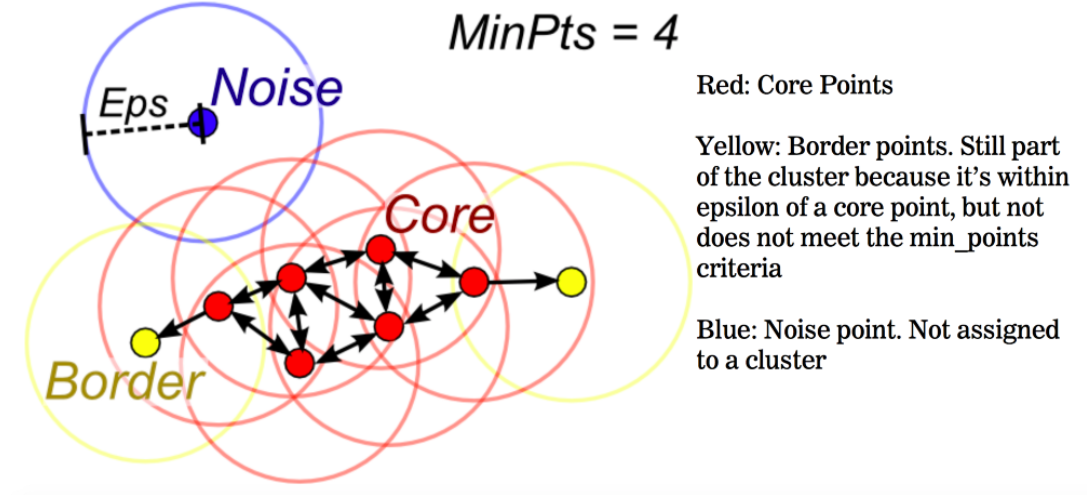

Based on the above parameters data points are classified into three categories.
1. Core Point, 2. Border point, 3. Noise point

**Core Point** 

A point is considered as core point if it has atleast MinPoints within its epsilon range. 

**Border Point** A selected point lies within epsilon neighborhood of core point but itself cannot be a core point.

**Noise Point** A selected point is neither core point nor Border point. These points are outliers that are not associated with any dense clusters.

#### how does it work?

Initially algorithm begins by selecting a point randomly from a set of points. Checks if the selected point is core point. Then it finds connected components of all core points, ignoring non-core points.

Assigns each non-core point to the nearest cluster if the cluster is in its epsilon range. Otherwise assigns it as noise.

The algorithm stops when it explores all the points one by one and classifies them as either core, border or noise point.